In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
e1 = pd.read_csv('/content/drive/MyDrive/completeSpamAssassin.csv.zip')
e2 = pd.read_csv('/content/drive/MyDrive/enronSpamSubset.csv.zip')
e3 = pd.read_csv('/content/drive/MyDrive/lingSpam.csv.zip')

In [ ]:
e1.head()

,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1


In [ ]:
e2.head()

,Unnamed: 0.1,Unnamed: 0,Body,Label
0,2469,2469,Subject: stock promo mover : cwtd\n * * * urge...,1
1,5063,5063,Subject: are you listed in major search engine...,1
2,12564,12564,"Subject: important information thu , 30 jun 20...",1
3,2796,2796,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,1468,1468,"Subject: "" bidstogo "" is places to go , things...",1


In [ ]:
e3.head()

,Unnamed: 0,Body,Label
0,0,Subject: great part-time or summer job !\n \n ...,1
1,1,Subject: auto insurance rates too high ?\n \n ...,1
2,2,Subject: do want the best and economical hunti...,1
3,3,Subject: email 57 million people for $ 99\n \n...,1
4,4,Subject: do n't miss these !\n \n attention ! ...,1


In [ ]:
e1.drop(['Unnamed: 0'],axis=1,inplace=True)
e2.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)
e3.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
email = pd.concat([e1,e2,e3],axis=0)

In [ ]:
email.head()

,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1


In [ ]:
email.sample(10)

,Body,Label
1236,Subject: formal semantics and sign ( ed ) lang...,0
4172,"Subject: entourage , stockmogul newsletter\n r...",1
7353,Subject: tiger team application forms\n vince ...,0
5036,"On Tue, 13 Aug 2002, David Raistrick wrote:> T...",0
2529,Subject: never pay for the goodz again ( 8 sim...,1
346,Subject: all generic viagra prices include a f...,1
772,WAKE UP!\n \nHere's the deal: Mortgage interes...,1
2337,Subject: coling - acl ' 98 workshop announceme...,0
6921,Subject: mid - year 2000 performance feedback\...,0
8417,Subject: raptor position reports for 12 / 28 /...,0


In [ ]:
print("Dataset shape:", email.shape)

Dataset shape: (18651, 2)


In [ ]:
email.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18651 entries, 0 to 2604
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    18650 non-null  object
 1   Label   18651 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.1+ KB


In [ ]:
email.isnull().sum()

Body     1
Label    0
dtype: int64

In [ ]:
email.iloc

In [ ]:
email.dropna(inplace=True)

In [ ]:
email.drop_duplicates()

,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1
...,...,...
2600,Subject: computationally - intensive methods i...,0
2601,Subject: books : a survey of american linguist...,0
2602,Subject: wecol ' 98 - - western conference on ...,0
2603,Subject: euralex ' 98 - revised programme\n \n...,0


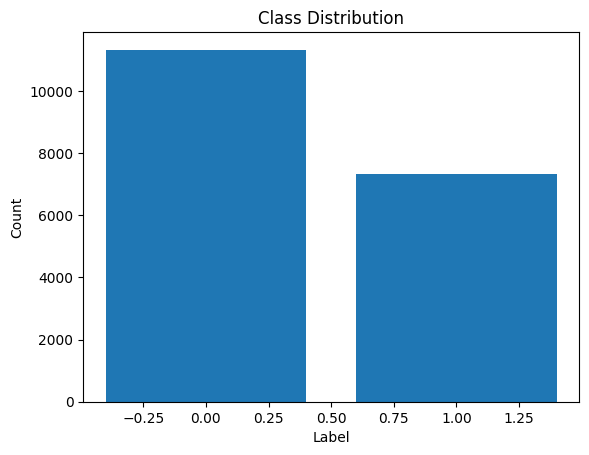

In [ ]:
label_counts = email['Label'].value_counts()
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

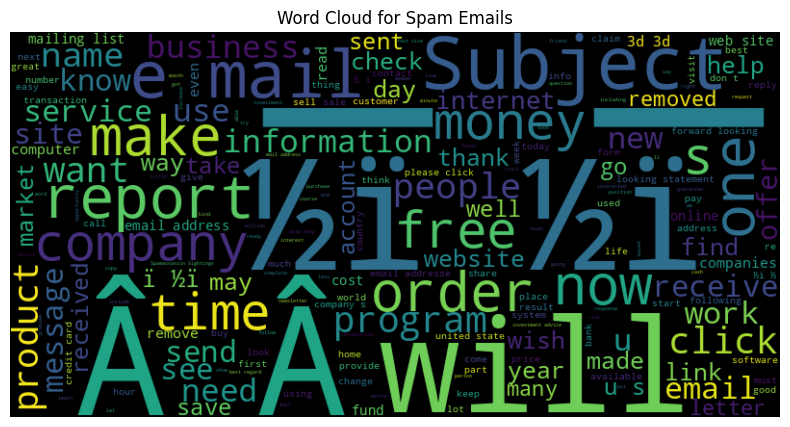

In [ ]:
from wordcloud import WordCloud

spam_emails = email[email['Label'] == 1]
spam_emails_with_content = spam_emails[spam_emails['Body'].notnull() & (spam_emails['Body'] != '')]

if not spam_emails_with_content.empty:
    spam_text = spam_emails_with_content['Body'].str.cat(sep=' ')
    wordcloud = WordCloud(width=800, height=400).generate(spam_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Spam Emails')
    plt.show()
else:
    print("No spam emails with content found.")

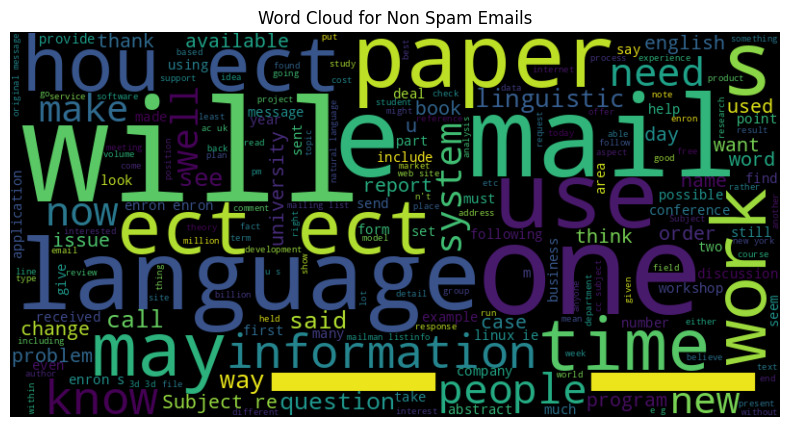

In [ ]:
spam_emails = email[email['Label'] == 0]
spam_emails_with_content = spam_emails[spam_emails['Body'].notnull() & (spam_emails['Body'] != '')]

if not spam_emails_with_content.empty:
    spam_text = spam_emails_with_content['Body'].str.cat(sep=' ')
    wordcloud = WordCloud(width=800, height=400).generate(spam_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Non Spam Emails')
    plt.show()
else:
    print("No spam emails with content found.")

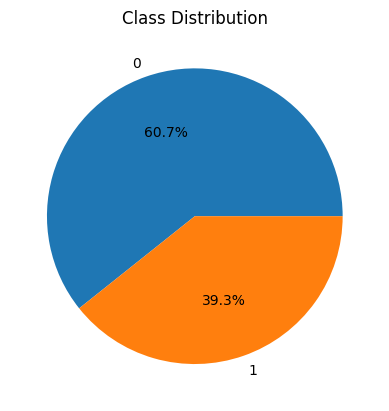

In [ ]:
import matplotlib.pyplot as plt
label_counts = email['Label'].value_counts()
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()

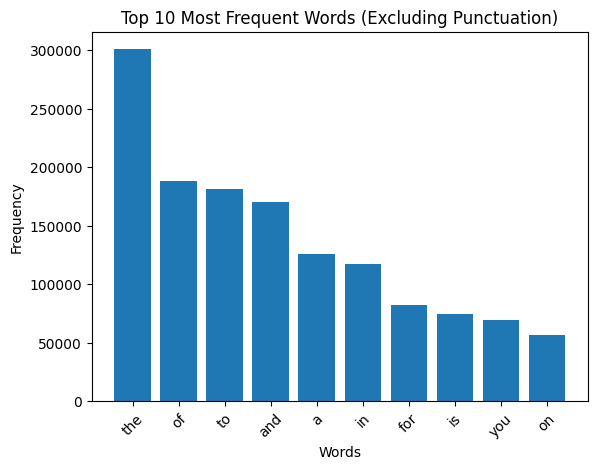

In [ ]:
import string
from collections import Counter

# Concatenate all email texts into a single string
all_text = ' '.join(email['Body'].astype(str).tolist())

# Remove punctuation marks from the text
all_text = all_text.translate(str.maketrans('', '', string.punctuation))

# Split the text into individual words and count their frequencies
words = all_text.lower().split()
word_counts = Counter(words)

# Select the top N most frequent words
top_n = 10
top_words = dict(word_counts.most_common(top_n))

# Create a bar plot for the top words
plt.bar(top_words.keys(), top_words.values())
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Most Frequent Words (Excluding Punctuation)')
plt.xticks(rotation=45)
plt.show()

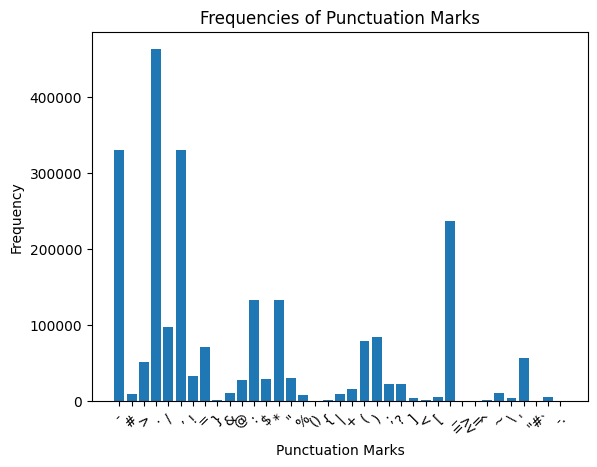

In [ ]:
# Concatenate all email texts into a single string
all_text = ' '.join(email['Body'].astype(str).tolist())

# Split the text into individual words
words = all_text.lower().split()

# Filter out words from punctuation marks
punctuation_marks = [word for word in words if word in string.punctuation]

# Count the frequencies of punctuation marks
punctuation_counts = Counter(punctuation_marks)

# Create a bar plot for punctuation frequencies
plt.bar(punctuation_counts.keys(), punctuation_counts.values())
plt.xlabel('Punctuation Marks')
plt.ylabel('Frequency')
plt.title('Frequencies of Punctuation Marks')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import re   # Importing the 're' module for regular expression matching and text pattern handling
import nltk   # Importing the 'nltk' library for natural language processing tasks
from nltk.corpus import stopwords   # Importing the 'stopwords' corpus from NLTK to access a list of common stop words
from nltk.stem import PorterStemmer, WordNetLemmatizer   # Importing stemmers and lemmatizers from NLTK for word normalization
from sklearn.feature_extraction.text import TfidfVectorizer   # Importing TfidfVectorizer from scikit-learn for text vectorization

In [ ]:
email['Body'] = email['Body'].str.lower()

In [ ]:
email['Body'] = email['Body'].apply(lambda x: re.sub('[^\w\s]', '', x))

In [ ]:
# Vectorization (TF-IDF)
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(email['Body'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Bag-of-Words (BoW) representation
vectorizer_bow = CountVectorizer()
bow_matrix = vectorizer_bow.fit_transform(email['Body'])

# TF-IDF representation
vectorizer_tfidf = TfidfVectorizer()
tfidf_matrix = vectorizer_tfidf.fit_transform(email['Body'])

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [ ]:
models = [
    SVC(),
    RandomForestClassifier(),
    MultinomialNB()
]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bow_matrix, email['Label'], test_size=0.2, random_state=42)

In [ ]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    model_name = type(model).__name__
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("---")

Model: SVC
Accuracy: 0.6080428954423592
Precision: 0.9615384615384616
Recall: 0.016823687752355317
F1 Score: 0.033068783068783074
---
Model: RandomForestClassifier
Accuracy: 0.9600536193029491
Precision: 0.9544527532290958
Recall: 0.9448183041722745
F1 Score: 0.9496110923233005
---
Model: MultinomialNB
Accuracy: 0.9458445040214477
Precision: 0.8895631067961165
Recall: 0.9865410497981157
F1 Score: 0.9355456285896617
---
